In [56]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np

autodata = pd.read_csv('auto-mpg.txt', delimiter = ";")
print autodata

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
5    15.0          8         429.0       198.0  4341.0          10.0   
6    14.0          8         454.0       220.0  4354.0           9.0   
7    14.0          8         440.0       215.0  4312.0           8.5   
8    14.0          8         455.0       225.0  4425.0          10.0   
9    15.0          8         390.0       190.0  3850.0           8.5   
10   15.0          8         383.0       170.0  3563.0          10.0   
11   14.0          8         340.0       160.0  3609.0           8.0   
12   15.0          8         400.0       150.0  3761.0          

AxesSubplot(0.125,0.125;0.775x0.755)


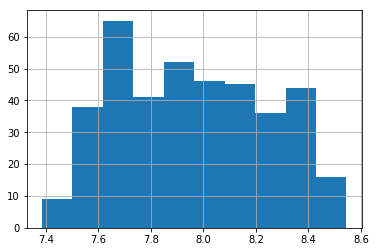

In [57]:
autodata["logweight"] = np.log(autodata["weight"])
print autodata["logweight"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


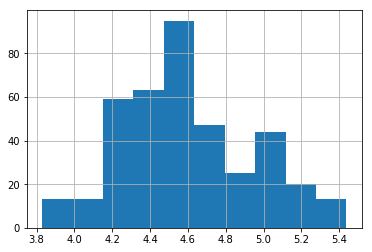

In [58]:
autodata["loghorsepower"] = np.log(autodata["horsepower"])
print autodata["loghorsepower"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


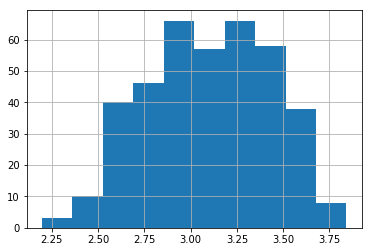

In [59]:
autodata["logmpg"] = np.log(autodata["mpg"])
print autodata["logmpg"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


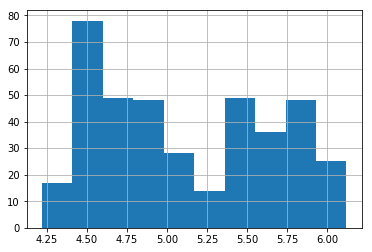

In [60]:
autodata["logdisplacement"] = np.log(autodata["displacement"])
print autodata["logdisplacement"].hist()

In [61]:
autodata.drop(["mpg", "weight", "displacement", "horsepower", "car name"], axis = 1, inplace = True)
print autodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
cylinders          392 non-null int64
acceleration       392 non-null float64
model year         392 non-null int64
origin             392 non-null int64
logweight          392 non-null float64
loghorsepower      392 non-null float64
logmpg             392 non-null float64
logdisplacement    392 non-null float64
dtypes: float64(5), int64(3)
memory usage: 24.6 KB
None


In [64]:
dummies = pd.get_dummies(autodata["origin"], prefix= "origin")
autodata.drop("origin", axis=1, inplace = True)
withDummies = pd.concat([autodata,dummies], axis =1)
print withDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
cylinders          392 non-null int64
acceleration       392 non-null float64
model year         392 non-null int64
logweight          392 non-null float64
loghorsepower      392 non-null float64
logmpg             392 non-null float64
logdisplacement    392 non-null float64
origin_1           392 non-null uint8
origin_2           392 non-null uint8
origin_3           392 non-null uint8
dtypes: float64(5), int64(2), uint8(3)
memory usage: 22.7 KB
None


In [66]:
from sklearn.model_selection import train_test_split
xprep = withDummies.drop('logmpg',1)
x_train, x_cv, y_train, y_cv = train_test_split(xprep,withDummies.logmpg, test_size =0.3)


AxesSubplot(0.125,0.125;0.775x0.755)


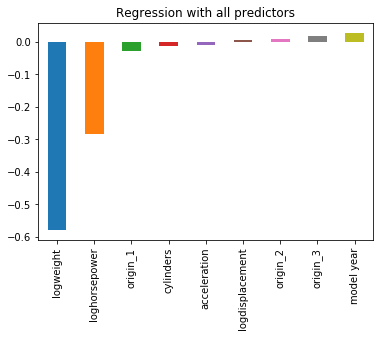

In [67]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train,y_train)
predictors = x_train.columns
coef = Series(data=lreg.coef_, index=predictors).sort_values()
print coef.plot(kind='bar', title='Regression with all predictors')

Training RMSEA: 0.11487171766896703
Testing RMSEA: 0.10704175736291739
difference = -0.007829960306049641


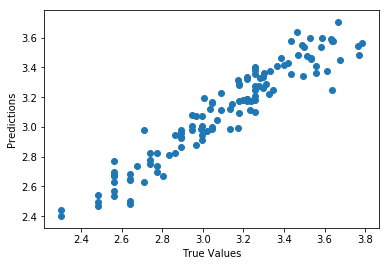

In [68]:
predictions = lreg.predict(x_train)
mse = np.mean((predictions - y_train)**2)
tr=np.sqrt(mse)
print "Training RMSEA: "+str(tr)

predictions = lreg.predict(x_cv)
mse = np.mean((predictions - y_cv)**2)
ts=np.sqrt(mse)
print "Testing RMSEA: "+str(ts)
print "difference = "+str(ts-tr)

plt.scatter(y_cv, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


In [72]:
from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV()
encv.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

AxesSubplot(0.125,0.125;0.775x0.755)


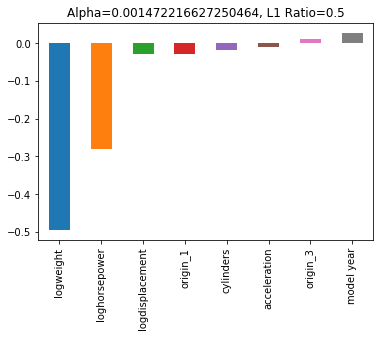

In [73]:
predictors = x_train.columns
coef = Series(encv.coef_,predictors).sort_values()
coef=coef[coef!=0]
print coef.plot(kind='bar', title='Alpha='+str(encv.alpha_)+', L1 Ratio='+str(encv.l1_ratio_))

Training RMSEA: 0.11519101642547247
Testing RMSEA: 0.10774721140475713
difference = -0.007443805020715344


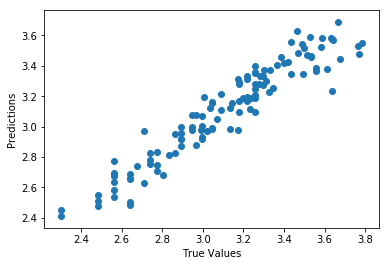

In [74]:
predictions = encv.predict(x_train)
mse = np.mean((predictions - y_train)**2)
tr=np.sqrt(mse)
print "Training RMSEA: "+str(tr)

#and here's how accurate on the testing data
predictions = encv.predict(x_cv)
mse = np.mean((predictions - y_cv)**2)
ts=np.sqrt(mse)
print "Testing RMSEA: "+str(ts)
print "difference = "+str(ts-tr)

plt.scatter(y_cv, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()